In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
np.random.seed(2343)

from matplotlib import animation
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVC

In [3]:
def get_Xgrid():

    dlim=[-1.2,1.2,-1.2,1.2]

    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()

    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
        
    return d1_grid, d2_grid, d12_array

In [4]:
colormap = {0:'black', 1:'red', 2:'blue'}
bkgrnd_colors = ListedColormap(['#8c8c8c', '#e68e8e', '#e68482'])

colormap_test = {0:'blue', 1:'orange', 2:'green'}

In [5]:
def plot_region(model, bkgrnd_colors, dlim=[-1.2,1.2,-1.2,1.2]):
    
    d1lim = dlim[:2]
    d2lim = dlim[2:]
    d1_grid, d2_grid = np.meshgrid(np.arange(d1lim[0], d1lim[1], 0.02), np.arange(d2lim[0], d2lim[1], 0.02))
    X0 = d1_grid.ravel()
    X1 = d2_grid.ravel()
    
    d12_array = np.empty((len(X0),2))
    d12_array[:,0] = X0
    d12_array[:,1] = X1
    
    y_array = model.predict(d12_array)
    y_grid = y_array.reshape(d1_grid.shape)
    plt.contourf(d1_grid, d2_grid, y_grid, cmap=bkgrnd_colors)

In [6]:
def plot_region_scatter(model,X,bkgrnd_colors,scatter_clolors, dlim=[-1.2,1.2,-1.2,1.2]):

    plt.figure(figsize=(8,7))

    # Data with a scatter plot
    s = plt.scatter(x=X[:,0], y=X[:,1], c=scatter_clolors)
    s.set_zorder(2)

    # plot the two regions
    plot_region(model,bkgrnd_colors,dlim)
    
    plt.show()

# 2D Non-Linear Classification

(-1.2, 1.2, -1.2, 1.2)

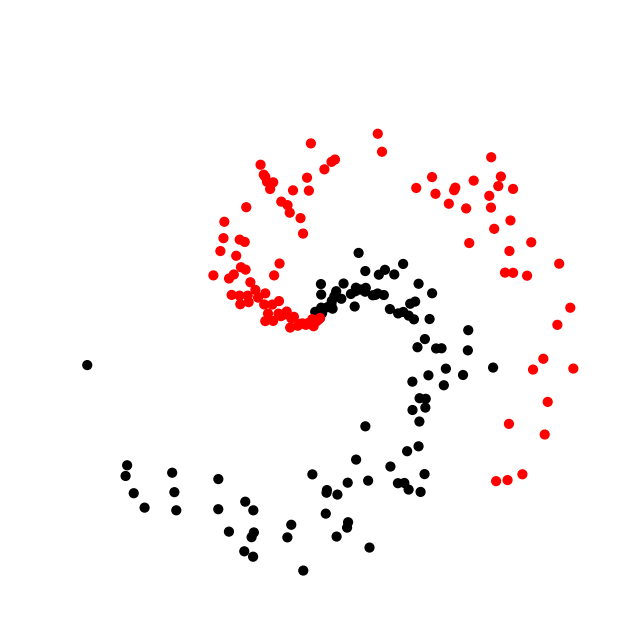

In [7]:
N = 100  # number of points per class
D = 2   # dimensionality
K = 2   # number of classes

def sampleit(NN):
    X = np.zeros((NN*K,D)) # data matrix (each row = single example)
    y = np.zeros(NN*K) # class labels

    for j in range(K):
      ix = range(NN*j,NN*(j+1))
      r = np.linspace(0.0,1,NN) # radius
      t = np.linspace(j*4,(j+1)*4,NN) + np.random.randn(NN)*0.4 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    return X, y

Xtrain, ytrain = sampleit(N)
scatter_colors_train = [colormap[yy] for yy in ytrain]

# lets visualize the data:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=scatter_colors_train, s=40)
plt.axis('equal')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.grid(linestyle='--')
plt.xticks(())
plt.yticks(())
ax.axis('off')

# SVM Classification

In [8]:
svm = SVC(kernel='linear')
svm = svm.fit(Xtrain, ytrain)

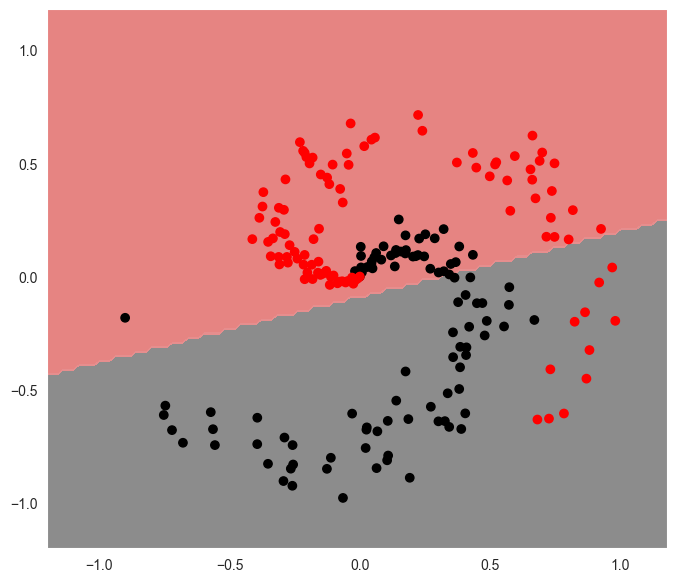

In [9]:
plot_region_scatter(svm, Xtrain,bkgrnd_colors,scatter_colors_train)

In [10]:
# Xtest, ytest = sampleit(40)

In [11]:
svm = SVC(kernel='rbf',gamma=10)
svm = svm.fit(Xtrain, ytrain)

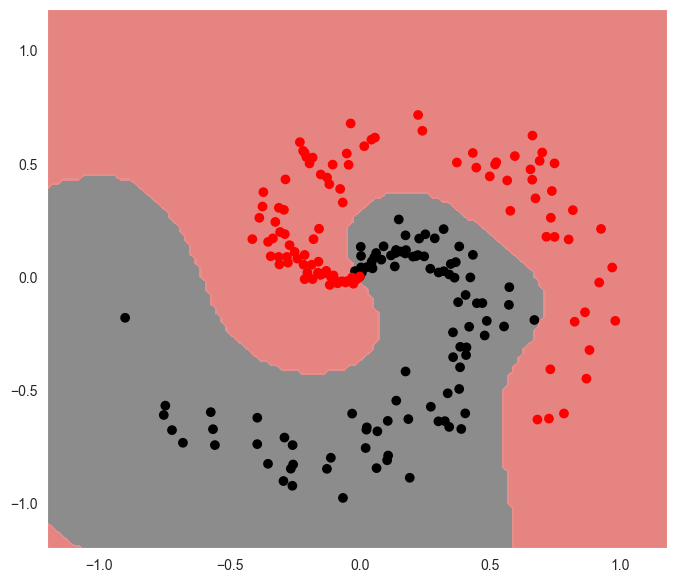

In [12]:
plot_region_scatter(svm, Xtrain,bkgrnd_colors,scatter_colors_train)

In [13]:
svm = SVC(kernel='poly', gamma='scale', coef0=1, degree=8)
svm = svm.fit(Xtrain, ytrain)

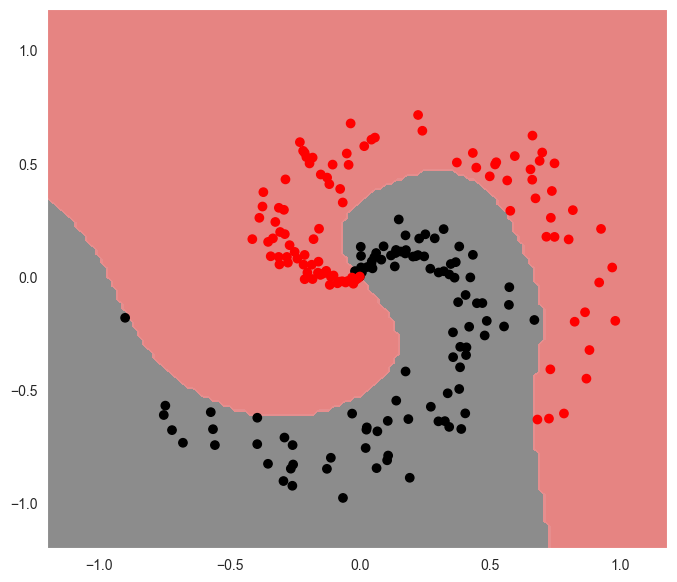

In [14]:
plot_region_scatter(svm, Xtrain,bkgrnd_colors,scatter_colors_train)

In [15]:
svm = SVC(kernel='sigmoid',coef0=1)
svm = svm.fit(Xtrain, ytrain)

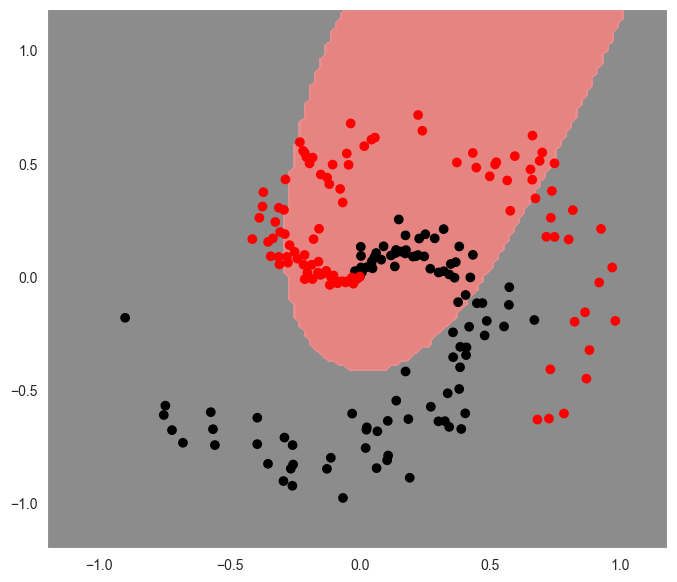

In [16]:
plot_region_scatter(svm, Xtrain,bkgrnd_colors,scatter_colors_train)

## SVM RBF video

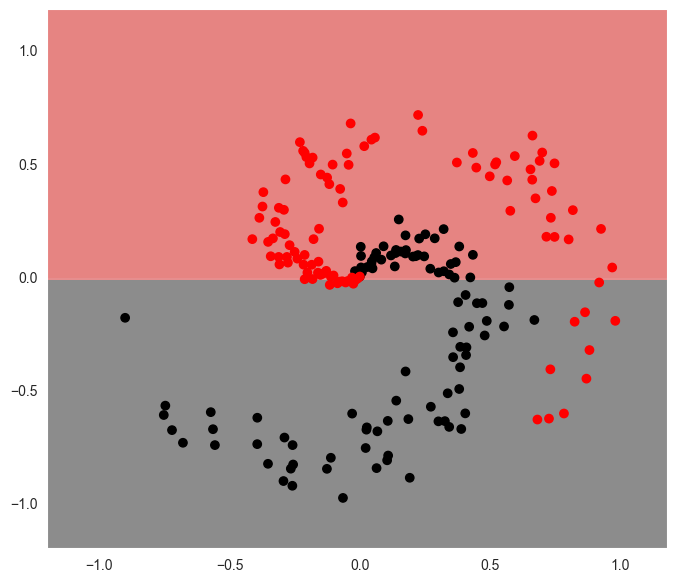

In [17]:
plt.figure(figsize=(8,7))

# Data with a scatter plot
s = plt.scatter(x=Xtrain[:,0], y=Xtrain[:,1], c=scatter_colors_train)
s.set_zorder(2)

d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]

y_array = np.empty(n**2)
y_array[:int(n**2/2)]=0
y_array[int(n**2/2):]=1
y_grid = y_array.reshape((n,n))
db = plt.contourf(d1_grid, d2_grid, y_grid, cmap=bkgrnd_colors)

(-1.21, 1.1900000000000022, -1.21, 1.1900000000000022)

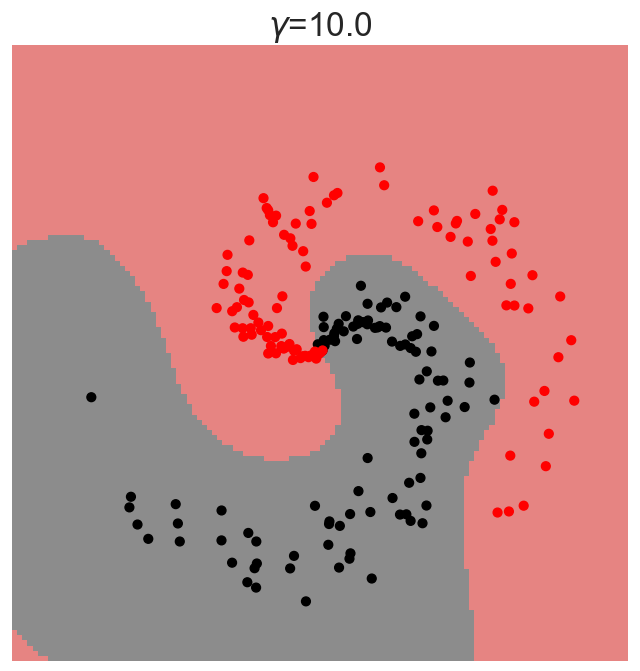

In [18]:
svm = SVC(kernel='rbf',gamma=10).fit(Xtrain, ytrain)

d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]
y_array = svm.predict(d12_array)
y_grid = y_array.reshape((n,n))
    
fig, ax = plt.subplots(figsize=(8,8))
db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=bkgrnd_colors)
tit = plt.title("$\gamma$={:.1f}".format(10),fontsize=24)
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=scatter_colors_train, s=40)
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.xticks(())
plt.yticks(())
plt.axis('equal')
plt.grid(linestyle='--')
ax.axis('off')

In [19]:

# initialization function: plot the background of each frame
def init():
    Z = np.append(np.zeros((120,60)), np.ones((120,60)),axis=1)
    db.set_array(Z.ravel())
    return db,

# animation function.  This is called sequentially
def animate_rbf(i):
    gamma = np.exp(i/29)
    svm = SVC(kernel='rbf',gamma=gamma).fit(Xtrain, ytrain)
    
    d1_grid, d2_grid, d12_array = get_Xgrid()
    n = d1_grid.shape[0]

    y_array = svm.predict(d12_array)
    y_grid = y_array.reshape((n,n))
    
    db.set_array(y_grid[:-1,:-1].ravel())
    tit.set_text("$\gamma$={:.1f}".format(gamma))
    return db,

In [20]:
# anim = animation.FuncAnimation(fig, animate_rbf, init_func=init,
#                                frames=200, interval=20, blit=True)
# anim.save('svm_rbf.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# SVM RBF cross validatation score vs gamma

In [21]:
Ntest = 60
Xtest, ytest = sampleit(int(Ntest/2))
scatter_colors_test = [colormap_test[yy] for yy in ytest]


cv_score = np.empty(200)
test_score = np.empty(200)
gammas = np.empty(200)
for i in range(200):
    gammas[i] = np.exp(i/29)
    svm = SVC(kernel='rbf',gamma=gammas[i],C=0.1).fit(Xtrain, ytrain)
    error = svm.predict(Xtest)-ytest
    test_score[i] = sum(error==0)/Ntest
    cv_score[i] = cross_val_score(svm, Xtrain, ytrain, cv=5).mean()
    

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

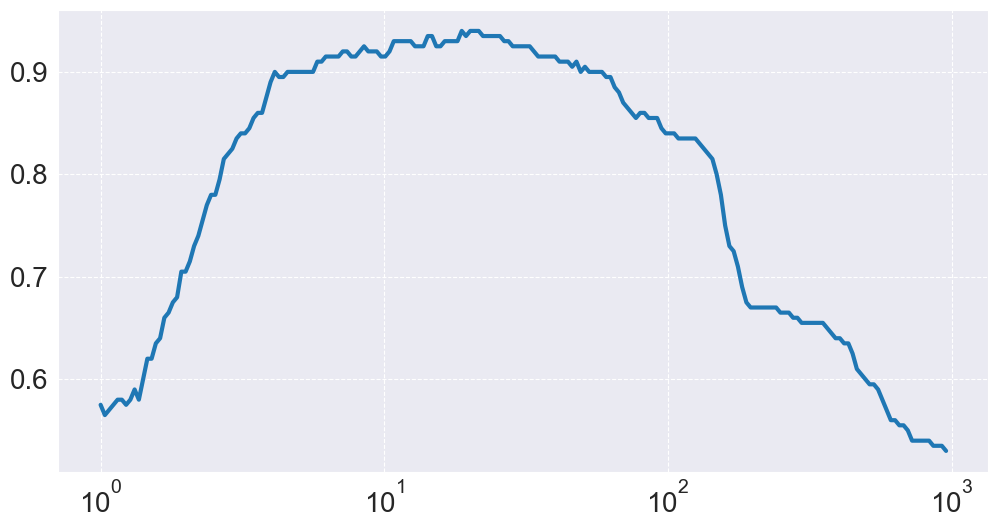

In [22]:
plt.figure(figsize=(12,6))
plt.semilogx(gammas,cv_score,linewidth=3,label='cross validation score')
# plt.semilogx(gammas,test_score,linewidth=3,label='test score')
plt.grid(linestyle='--')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend()

In [23]:
gamma_star = gammas[np.argmax(cv_score)]
gamma_star 

18.747013931717614

(-1.21, 1.1900000000000022, -1.21, 1.1900000000000022)

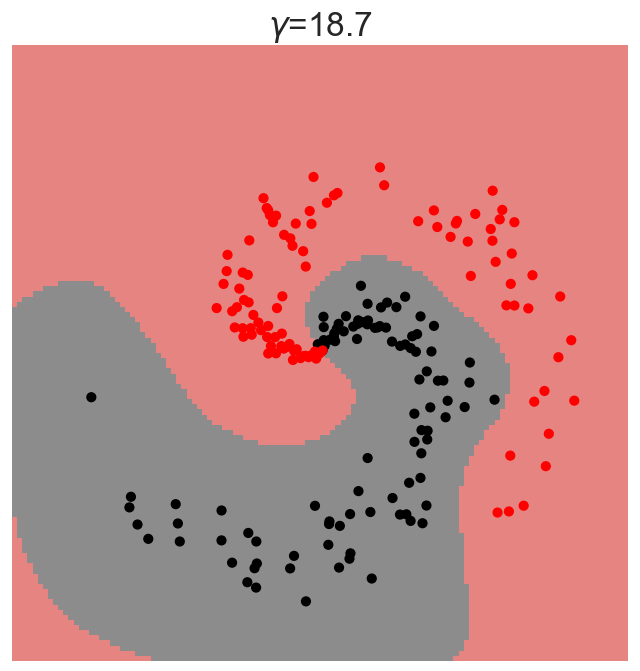

In [24]:
svm = SVC(kernel='rbf',gamma=gamma_star).fit(Xtrain, ytrain)

d1_grid, d2_grid, d12_array = get_Xgrid()
n = d1_grid.shape[0]
y_array = svm.predict(d12_array)
y_grid = y_array.reshape((n,n))
    
fig, ax = plt.subplots(figsize=(8,8))
db = plt.pcolormesh(d1_grid, d2_grid, y_grid,cmap=bkgrnd_colors)
tit = plt.title("$\gamma$={:.1f}".format(gamma_star),fontsize=24)
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=scatter_colors_train, s=40)
# plt.scatter(Xtest[:,0], Xtest[:,1], c=scatter_colors_test, s=40)

plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.xticks(())
plt.yticks(())
plt.axis('equal')
plt.grid(linestyle='--')
ax.axis('off')